<a href="https://colab.research.google.com/github/ebwhite1994/numpy_workshop_24/blob/main/numpy_workshop_fall24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with NumPy
## PyIU Advanced Python Workshop

Author: Ethan White, Lexi Gault

Last modified: 10/21/2024


### Introduction to $\texttt{NumPy}$

Often, in research, you want to analyze many things at the same time. A few examples could be the masses of multiple stars, the luminosity of a collection of galaxies, or the orbital periods of planets (just to name a few).

NumPy can be a great tool to help analyze a collection of data easily and efficiently! You can find more about the basic characteristics and uses of NumPy [here.](https://numpy.org/doc/stable/user/whatisnumpy.html)  

Before we get to actually using Numpy, lets explore the defult option for storing a lot of data in Python (lists).

Lists are a method of storing data (positions, velocities, masses, whatever you want) that Python recognizes without having to load in any special modules.

In [ ]:
#Create a list with a few values to use in examples
test_list = [1, 2, 3, 4]
print(test_list)

[1, 2, 3, 4]


We can see that our test values are stored in the list and we can call them later (for example, in print(test_list)).

However, lists don't work great if we wanted to do math operations on them. Say, if we wanted to multiple all the values in the list by some number.

In [ ]:
print(test_list * 2)

[1, 2, 3, 4, 1, 2, 3, 4]


Rather than multiplying the values by our constant, this tells Python to repeat the list (twice in this example).

If we wanted to do some math operation on each value in our list, we would have to make a loop and do the calculation each time. (This goes through each item in our list and does the operation each time.)

In [ ]:
#Create a new, empty list to store our multiplied values
new_list = []
#Go through each item in our list and multiple it by 2
for i in range(len(test_list)):
  #put the multiplied items in our new list
  new_list.append(test_list[i] * 2)
#print out the old and new list to see the differences
print(test_list)
print(new_list)

[1, 2, 3, 4]
[2, 4, 6, 8]


For the four values we have here, that doesn't take very long; but once you move to a catalogue that might have thousands of stars (*or a simulation which could have hundreds of thousands*) and more complicated math operations, this can really add up.

By using Numpy, you can reduce the time it takes to run things by utilizing what are called "arrays."

Arrays are like lists in that they can store data. Arrays, however, are much better for performing math operations!

Before we use Numpy, however, we have to tell python to load it.

We use an alias so that whenever we use Numpy, we don't have to type out the whole name.

In [ ]:
#Bring in this package (numpy) and give it a name so you don't have to type "numpy" every time. np is the name most people use.
#It can be useful to use that abbreviation as well so when you need to look up how to do something online, you are already using the same name as the people who have the answers.
import numpy as np

Since we already have a list of values, let's use that. We can use np.asarray() to turn a list into an array.

In [ ]:
#Create an array to work with
#For simplicity, we will use "asarray" to turn our list we were working with already into a numpy array.
test_array = np.asarray(test_list)
print(test_array)

[1 2 3 4]


When printed out, this array looks the same as the list we had before before. But when we try to do math using the array...

In [ ]:
print(test_array * 2)

[2 4 6 8]


Now instead of having to make that loop and create a whole new list, we can  simply multiply the array and get the results!

Now that we know why you might want to use an array, we can talk about how to work with them in more detail.

Let's say our array corresponded to distances to stars in light years (ly) and we were only interested in stars that were closer to use (lets say less than 5 ly).

In [ ]:
#Let's make an array so that our name makes sense with what we are doing
star_dist = test_array * 2
print(star_dist)

[2 4 6 8]


We can print individual values of our array by using brackets [ ] at the end of our array. This can be useful if you want to look at a specific item of your array.

If you were to look at the loop we made for our list at the beginning of the notebook, you would see the same indexing method. The way you call items from an array and a list using brackets is the same!

In [ ]:
#We know that our first two stars meet our conditions (distances less than 5 ly).
#We can print out those distances specifically by calling the items from our array.
#To do this we use brackets [] with a number inside immediately after our array. Specifically, this must be an integer (0, 1, 2, etc. *not* 1.0, 2.0...)
#It important to know that python is a 0 indexed language, so to get the first item of our array, we actually need to write [0]
print(star_dist[0])
print(star_dist[1])
print(star_dist[2])
print(star_dist[3])
#Notice how we can't print the [4] index of the array because, even though there are four items in the array, the index numbering begins at 0. This would make [4] the 5th item in our array of four items.
print(star_dist[4])

2
4
6
8


IndexError: index 4 is out of bounds for axis 0 with size 4

If you wanted to get multiple items from an array at the same time, you can get a "slice" of an array. This also uses the brackets [ ] combined with a colon :

In [ ]:
#If we want a range of stars, not just individual ones, we can get a slice of the array.
print(star_dist[:2])

[2 4]


The colon ":" here tells the array that we want to look between two specific indices.

Since we don't have anything before the colon, that tells numpy that we want items from the very **start** of the list.

Our final index (here "2") says the index we want to go *up* to but **not** including it. So we show the items corresponding to star_dist[0] and star_dist[1], but **not** star_dist[2].

In the same way, we could look at the outer stars.

In [ ]:
print(star_dist[2:])

[6 8]


In this case our starting index is 2 (we show star_dist[2]) and then since there is not number after the colon, it tells numpy we want to see all the items beyond the index (from 2 until the end).

If we didn't know the index numbers where the stars had distances greater than 5 ly already, we could also use numpy to figure it out!

np.where() is a method which you can use to determine where in the array some condition (or set of conditions) is met. In our example, we'll find where in the array items have a distance less than 5 ly and where items have a distance greater than (or equal to) 5 ly.

In [ ]:
#np.where() takes in an array and an argument. Here, that is our distance array (star_dist) and our condition (distances less than 5)
#We then apply np.where() like we would the indices we were using before, in brackets "array[np.where()]"
print("The distances of stars in our array with total distance less than 5 ly are:")
print(star_dist[np.where(star_dist < 5)])

#We can do the same for stars with distances 5 ly or greater by changing the condition in np.where()
print("The distances of stars in our array with total distance greater than or equal to 5 ly are:")
print(star_dist[np.where(star_dist >= 5)])

#We put the equal sign into ">=" to make sure that we don't exclude any stars which have distances *exactly equal* to 5 ly

The distances of stars in our array with total distance less than 5 ly is:
[2 4]
The distances of stars in our array with total distance greater than or equal to 5 ly is:
[6 8]


We can also use multiple conditions in np.where().

Let's find where the distance is greater than 2 ly, but also less than 8 ly.

In [ ]:
print("The distances of stars in our array which have distances greater than 2 ly and less than 8 ly are:")
print(star_dist[np.where((star_dist > 2) & (star_dist < 8))])

The distances of stars in our array which have distances greater than 2 ly and less than 8 ly are:
[4 6]


Each condition is surrounded by parenthesis ( ) and has an ampersand & between them. You can apply as many conditions as you want as long as you surround each condition with ( ) and separate them with &.

Finally, let's combine all the things we have used to see the power of NumPy arrays.

NumPy has a number of mathematical capabilities that you can use, some will be invoked below. For a full list, you can visit the documentation here: https://numpy.org/doc/stable/reference/routines.math.html

First, however, let's make a function.

A function takes in an input and produces an output, like a machine or an assembly line.

In this case, let's give our function cartesian coordinates and have it produce a distance (radius).

In [ ]:
#We first have to define our function (def) and give it a name
#We then use ( ) to encompass our inputs and put a colon ":" to start telling it what we want it to do
#In this case, we want to make a radius, so let's give it x, y, and z components.
def radius(x, y, z):
  r = np.sqrt(x ** 2 + y ** 2 + z ** 2)
  return(r)

The function we have made will take in x, y, and z components and return a 3D radius.

Let's try it out using indvidual values.

In [ ]:
x1 = 2
y1 = 3
z1 = 4
print("The radius using " + str(x1) + ", " + str(y1) + ", and " + str(z1) + " is " + str(radius(x1, y1, z1)))

x2 = 4
y2 = 6
z2 = 1
print("The radius using " + str(x2) + ", " + str(y2) + ", and " + str(z2) + " is " + str(radius(x2, y2, z2)))

The radius using 2, 3, and 4 is 5.385164807134504
The radius using 4, 6, and 1 is 7.280109889280518


Using the power of arrays, however, we can input a whole bunch of values at once and get out an array of radii!

We can make some random values to use for out cartesian coordinates.

In [ ]:
x_rand = np.random.randn(1, 10)
y_rand = np.random.randn(1, 10)
z_rand = np.random.randn(1, 10)
print(x_rand)
print(y_rand)
print(z_rand)

[[-0.78135111  1.81521048 -0.17467659  0.08721339 -0.29493574  0.64070778
  -0.77697586  0.57425503  1.37541179 -3.56414949]]
[[ 1.02282902e+00  2.51548171e-01  6.10616482e-01  2.74442221e-01
   1.30678391e+00 -1.22187447e+00 -5.81696328e-01 -1.25297434e-03
  -5.73654010e-01 -1.27994056e-01]]
[[ 1.48802739  1.0341357  -0.34231927  0.31857005 -1.36197456 -1.35291476
   0.14991907 -1.65581504 -1.12510527 -1.2871085 ]]


Now all we need to do to turn these cartesian coordinates into radii is plug our arrays into our function.

Rather than just printout out what the result is, we can save our values by setting a new variable equal to our function.

In [ ]:
r = radius(x_rand, y_rand, z_rand)
print(r)

[[1.96746392 2.1042106  0.72148935 0.4294317  1.91040466 1.93232037
  0.98210887 1.75256779 1.8672703  3.79159496]]


So far, we have shown the power of NumPy as a tool for quickly performing math/analysis on an array of data points.

There are multiple types of NumPy arrays that can be useful!

In [ ]:
## Basic array: creates a simple array from passing a list to it
np_array = np.array([1, 2, 3, 4])
print("Regular NumPy array:", np_array)

## Zeros array: creates an array of 0s of the length you specify
zeros_array = np.zeros(5)
print("Zeros array:",zeros_array)

## Ones array: creates an array of 1s of the length you specify
ones_array = np.ones(5)
print("Ones array:",ones_array)

## Empty array: creates an empty array of the length you specify
empty_array = np.empty(5)
print("Empty array:",empty_array)

# Note!: if we print our empty array, it will be filled with random values.

## Zeros, Ones, and Empty arrays are often used as place holder arrays that are later filled with something else.
# We can fill the empty array as an example below:
for i in range(len(empty_array)):
  empty_array[i] = i
print("Empty array filled with new values:",empty_array)

Regular NumPy array: [1 2 3 4]
Zeros array: [0. 0. 0. 0. 0.]
Ones array: [1. 1. 1. 1. 1.]
Empty array: [1. 1. 1. 1. 1.]
Empty array filled with new values: [0. 1. 2. 3. 4.]


In [ ]:
## Often really helpful are arrays filled with ranges of numbers, which we can do in a couple of ways.

## A range: creates an array that contains a range of evenly spaced integers, will take inputs as np.array(min,max,stepsize)
range_array = np.arange(0, 10, 1)
print(range_array)

## Linear space: creates an array of values that are linearly spaced in a specified interval, will take inputs as np.array(min,max,number of total elements)
linspace_array = np.linspace(1, 10, 10)
print(linspace_array)

[0 1 2 3 4 5 6 7 8 9]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Let's use a NumPy generated range of numbers to do some math!

In [ ]:
# Perhaps we want to plot sine, cosine, and tangent waves. We can do that over the same x range pretty easily in NumPy!

x_degrees = np.arange(-360,360,0.1)

#The NumPy trigonometric functions take values in radians, so we want to convert from degrees to radians!
x_radians = np.radians(x_degrees)

#Now we can very easily pass the x range through the sine, cosine, and tangent functions
y_sin = np.sin(x_radians)
y_cos = np.cos(x_radians)
y_tan = np.tan(x_radians)

In [ ]:
# Let's make a quick plot to see what we just did!
import matplotlib.pyplot as plt

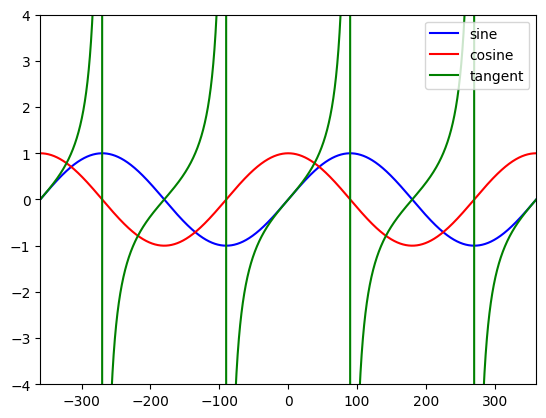

In [ ]:
plt.plot(x_degrees, y_sin, color = 'blue',label='sine')
plt.plot(x_degrees, y_cos, color = 'red', label='cosine')
plt.plot(x_degrees, y_tan, color = 'green',label='tangent')
plt.legend(loc="best")
plt.xlim(-360,360)
plt.ylim(-4,4)
plt.show()

### We can also use NumPy to read in data files.

There are a couple of ways that you can read in data files. Which way you use depends on personal preference, and sometimes the type of data file you are reading in and what you want from it.

In [ ]:
# We can load in a text file like the following!
data = np.loadtxt('star_nums.txt')
#But wait, the data columns are labeled, and np.loadtxt doesn't read in strings

ValueError: could not convert string 'rank,' to float64 at row 0, column 1.

In [ ]:
data = np.loadtxt('star_nums.txt',skiprows=1)
print(data)
print(data[0])

[[ 0.000e+00  0.000e+00 -2.674e+01]
 [ 1.000e+00  8.600e+00 -1.460e+00]
 [ 2.000e+00  3.100e+02 -7.400e-01]
 [ 3.000e+00  4.340e+00 -2.700e-01]
 [ 4.000e+00  3.700e+01 -5.000e-02]
 [ 5.000e+00  2.500e+01  3.000e-02]
 [ 6.000e+00  4.300e+01  8.000e-02]
 [ 7.000e+00  8.600e+02  1.300e-01]
 [ 8.000e+00  1.100e+01  3.400e-01]
 [ 9.000e+00  1.400e+02  4.600e-01]
 [ 1.000e+01  6.400e+02  5.000e-01]]
[  0.     0.   -26.74]


You can see each row is put into an array within the larger data array. We could write some lines to put each data column into its own array, or we can generate the arrays using a different read in method.

In [ ]:
data = np.genfromtxt('star_nums.txt',skip_header=1,usecols=(0,1,2),names=('rank','distance','magnitude'))
print(data['rank'])
print(data['distance'])
print(data['magnitude'])

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[  0.     8.6  310.     4.34  37.    25.    43.   860.    11.   140.
 640.  ]
[-26.74  -1.46  -0.74  -0.27  -0.05   0.03   0.08   0.13   0.34   0.46
   0.5 ]
